<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/05-Time_Series/B-ERCOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing electricity usage from Electric Reliability Council of Texas (ERCOT)

We will be analyzing the electricity usage data from ERCOT.

ERCOT releases the [electricity usage of their grid](http://www.ercot.com/gridinfo/load) and they [provide archival copies of their data](http://www.ercot.com/gridinfo/load/load_hist).
(ERCOT also publishes their own load forecasts, this is a good baseline for any model.)

In [2]:
!apt-get install -q unzip
!pip install -U -q pip
!pip install -U -q statsmodels xlrd PyMySQL sqlalchemy sql_magic prophet

Reading package lists...
Building dependency tree...
Reading state information...
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

# Load and plot the data


In [4]:
conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    password = 'dwdstudent2015', 
    db = 'ercot',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)
con = engine.connect()

# This query loads the dataset from the DB into the dataframe 
df = pd.read_sql("SELECT * FROM ercot.electricity", con=con)
df = df.set_index('DATE_TIME')

con.close()

In [5]:

df

,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
DATE_TIME,,,,,,,,,
2002-01-01 01:00:00,8331.469266,1111.096549,1094.045496,995.298392,10336.304899,2165.007571,4793.193560,843.747177,29670.162911
2002-01-01 02:00:00,8107.805431,1091.481584,1083.517981,981.195477,10178.052738,2092.374118,4766.918187,835.488188,29136.833703
2002-01-01 03:00:00,7890.721717,1080.257616,1085.038740,971.305257,10100.887710,2042.080714,4702.918892,830.694878,28703.905525
2002-01-01 04:00:00,7799.817527,1079.726403,1093.381853,971.262963,10081.565109,2011.935791,4669.064391,835.068413,28541.822450
2002-01-01 05:00:00,7815.968171,1087.934961,1106.651296,982.535591,10192.218670,2002.487678,4695.011904,848.598209,28731.406478
...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,13926.775034,1566.583851,4192.977787,916.124441,11942.416165,3910.031058,7401.098687,1133.093917,44989.100940
2021-12-31 21:00:00,13498.908542,1549.687559,4149.062209,886.943872,11406.911057,3681.222926,7088.478765,1102.727285,43363.942215
2021-12-31 22:00:00,13116.012129,1515.852644,4148.330779,859.408149,10978.547227,3515.077507,6800.707246,1071.686005,42005.621687


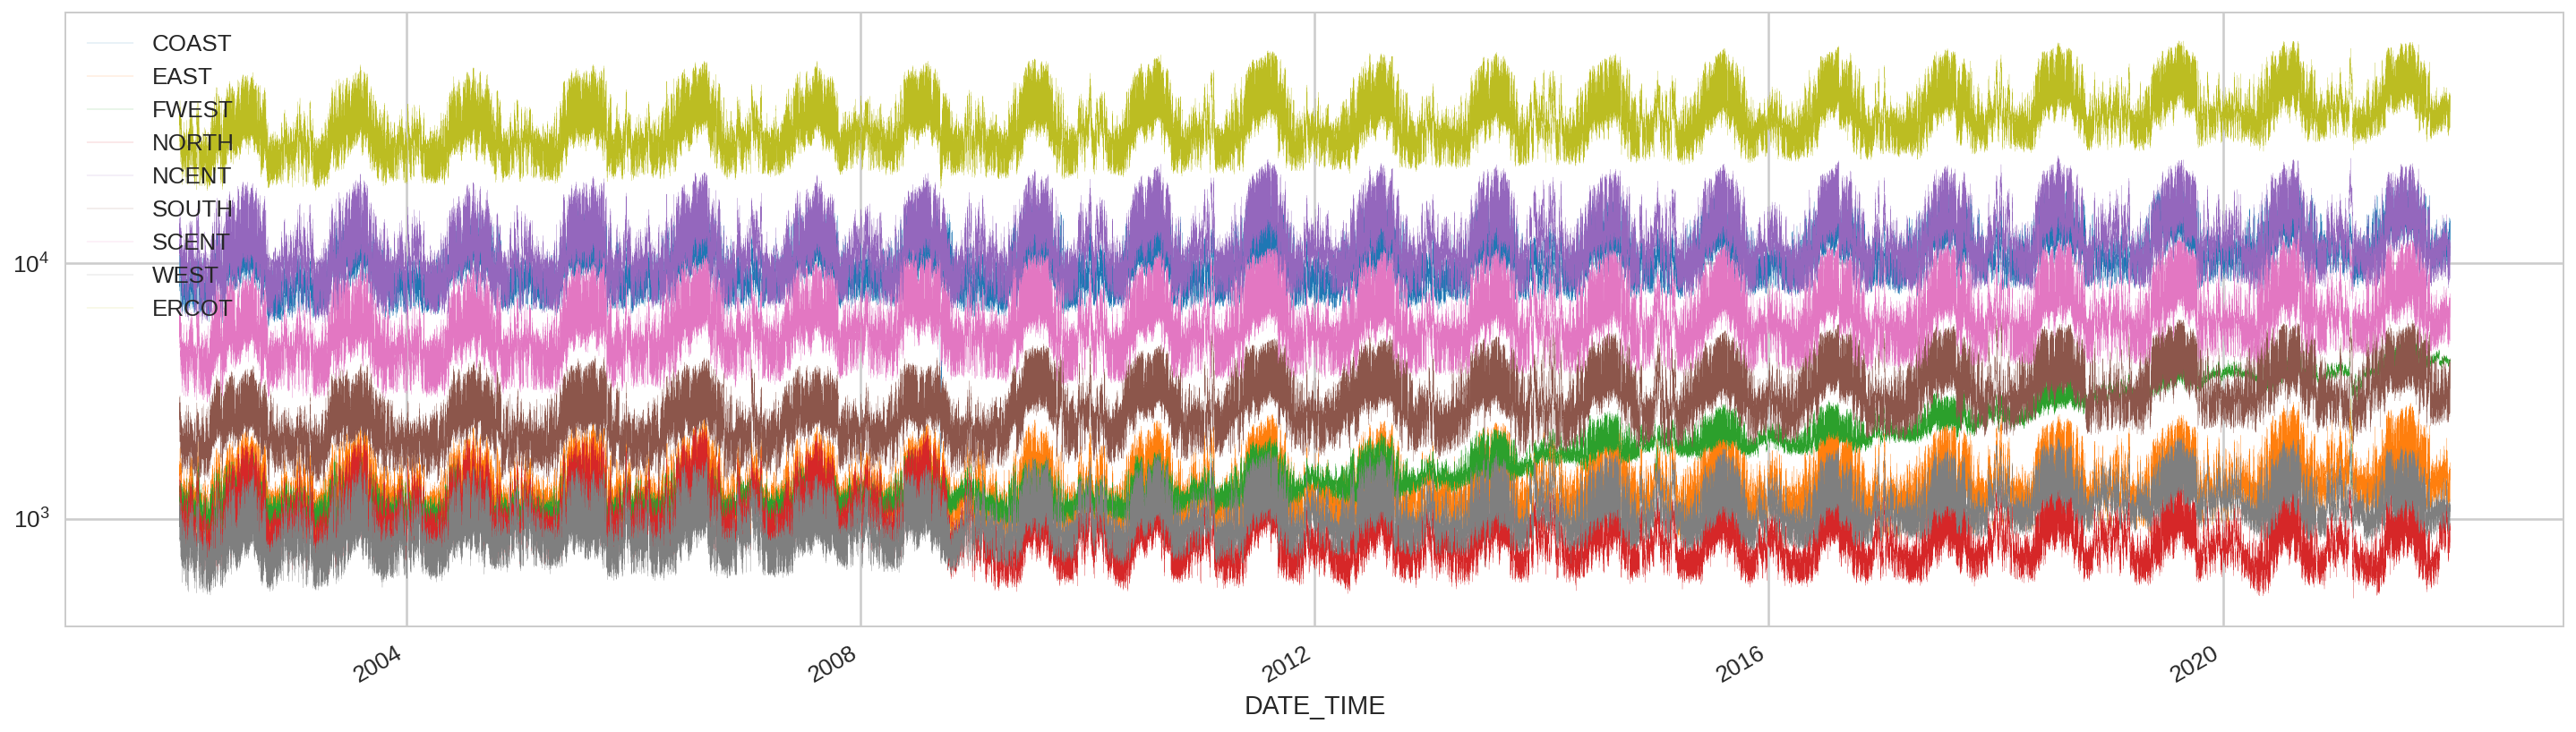

In [6]:
df.plot(figsize=(25,7), linewidth=0.1, logy=True)

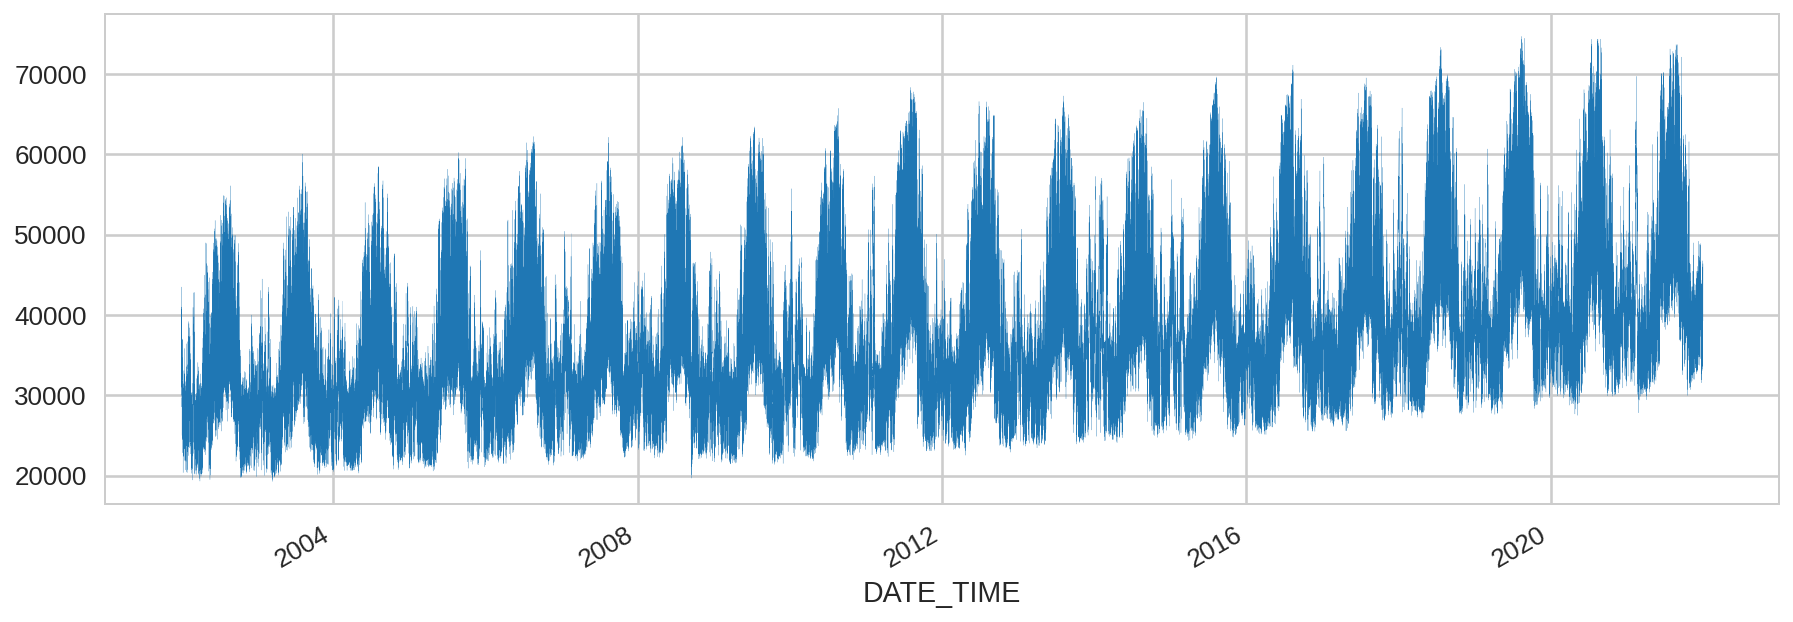

In [7]:
df.ERCOT.plot(linewidth=0.1, figsize=(15,5))


# Potential questions:

* We are trying to perform capacity planning. How will demand evolve over time? Can we make projections for the next 5 years?
* We care about the maximum capacity of our system as we need to avoid blackouts. Make projections for the total capacity necessary to avoid blackouts. Ideally, provide confidence intervals showing how much maximum capacity we need.
* Perform the analysis on a regional basis, and identify capacity planning for the regions (COAST, WEST, etc)

## Extracting Time Series Components: Trend, Seasonal, Residual 

In [52]:
df.ERCOT.autocorr()

0.9836856155030475

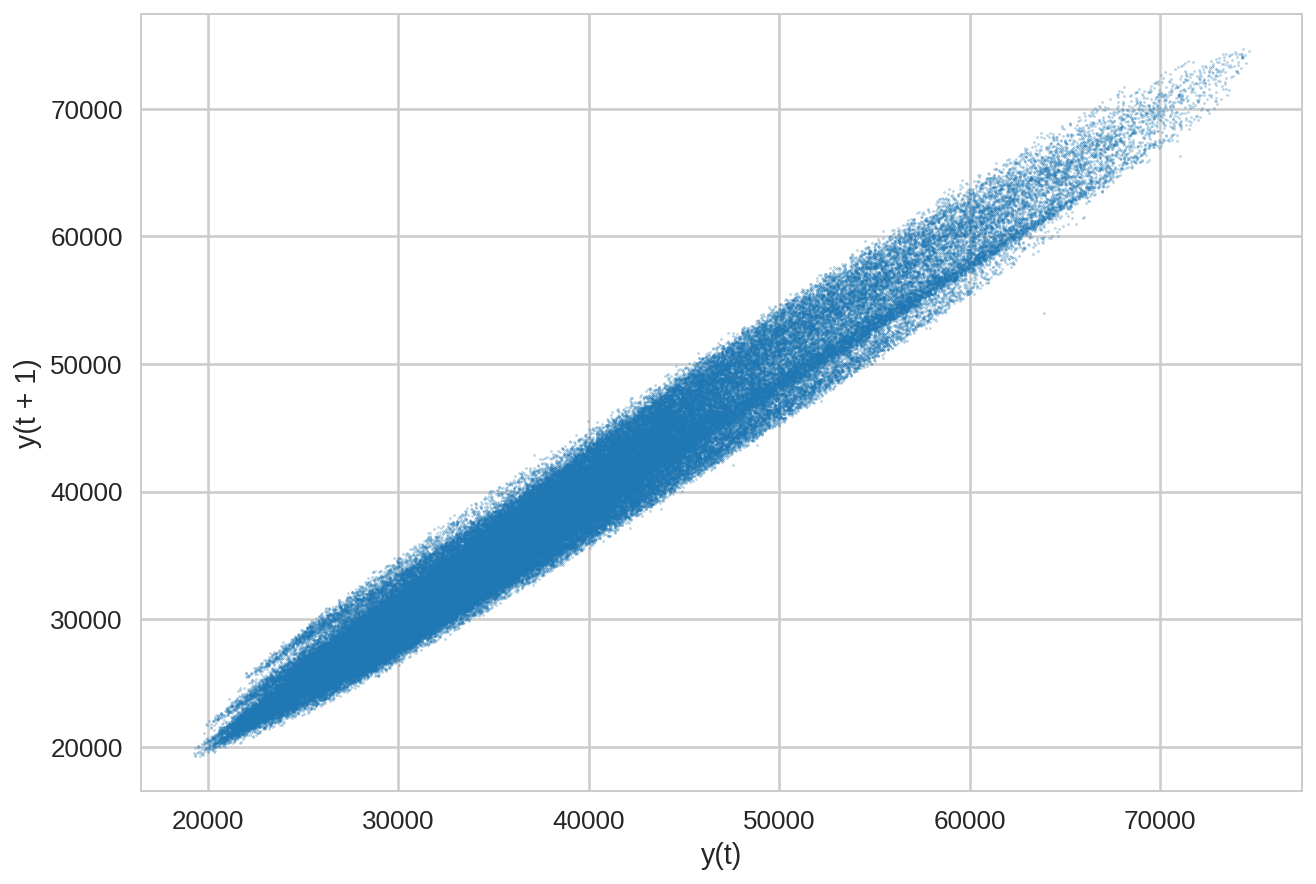

In [57]:
pd.plotting.lag_plot(df.ERCOT, lag=1, s=1, alpha=0.25 )

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + R[t]
# The multiplicative model is Y[t] = T[t] * S[t] * R[t]

### Extracting Daily Seasonal Component

In [9]:
Y = df.ERCOT

decompose = seasonal_decompose(Y, 
                                model='multiplicative', 
                                period=24, 
                                extrapolate_trend='freq')

T_d, S_d, R_d = decompose.trend, decompose.seasonal, decompose.resid

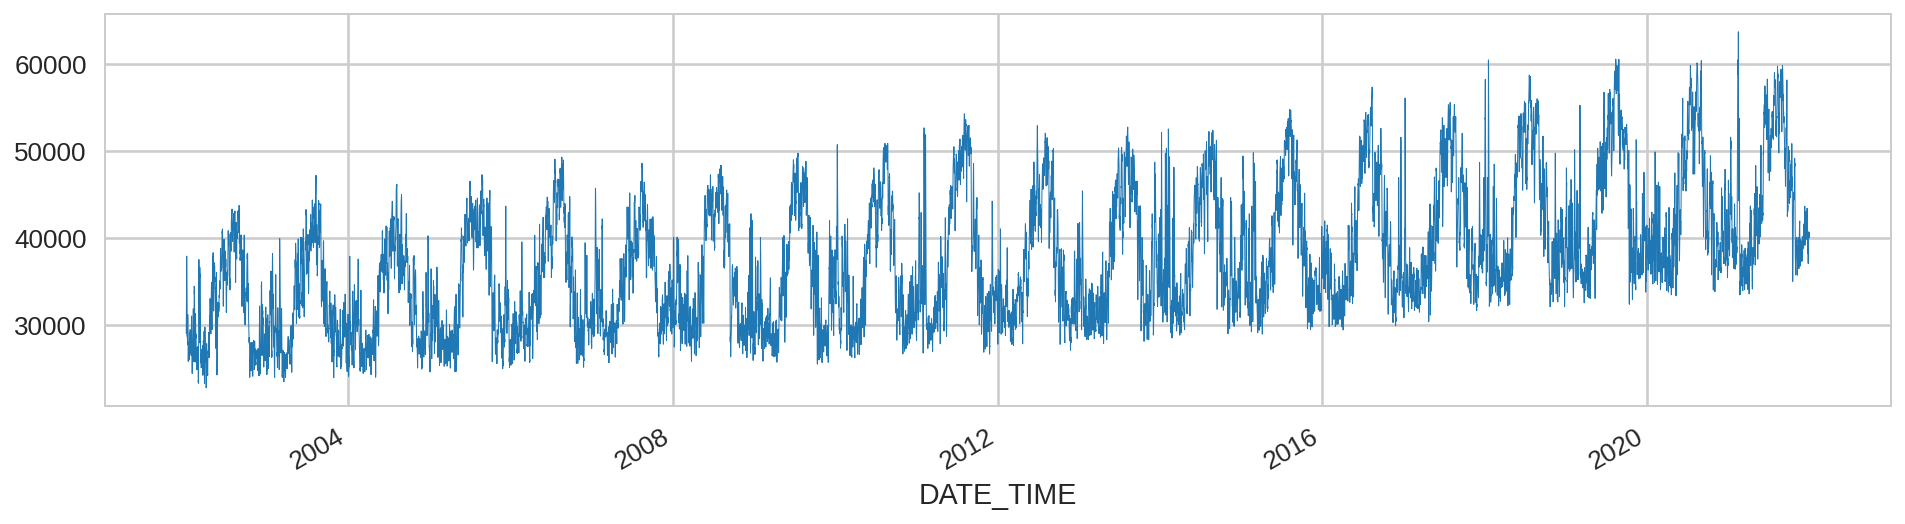

In [10]:
T_d.plot(linewidth=0.5, figsize=(16,4))

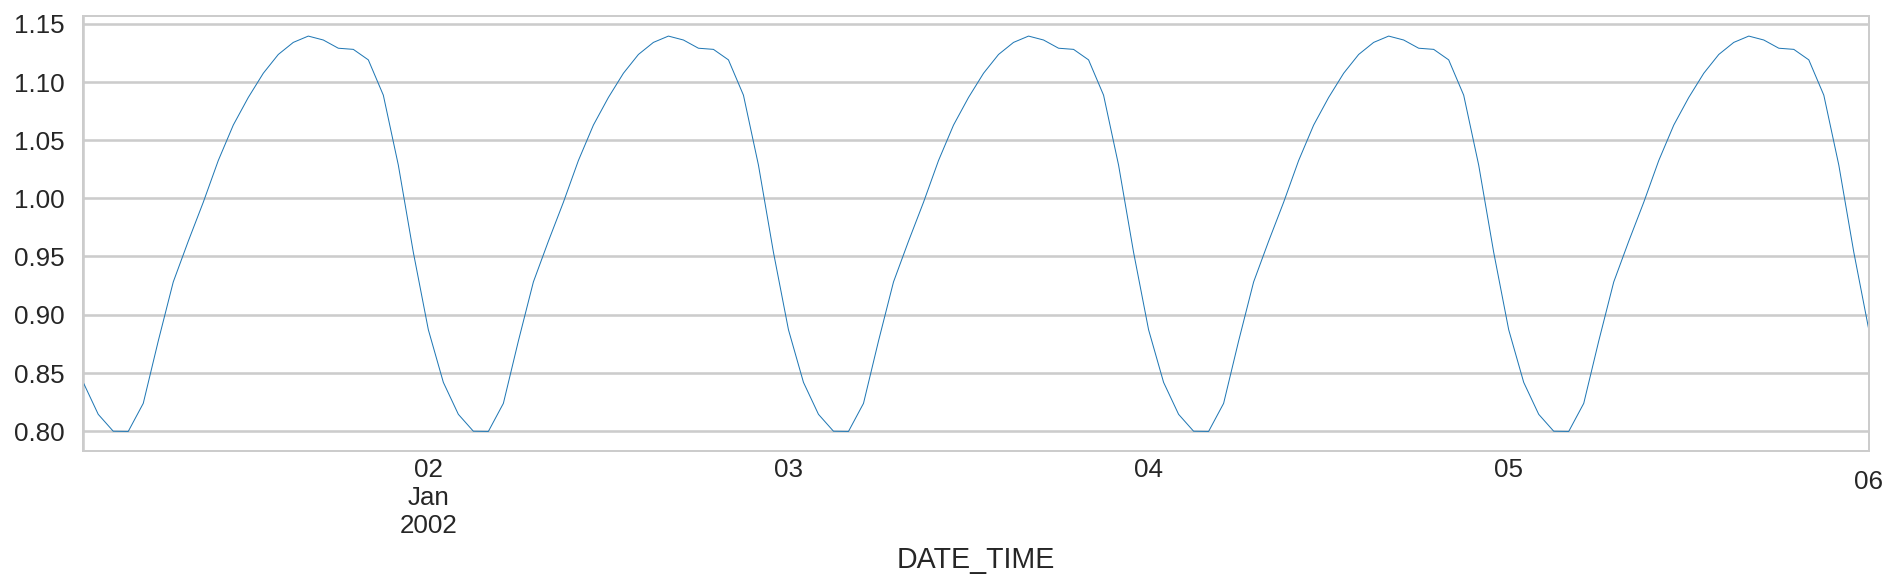

In [11]:
S_d[:24 * 5].plot(figsize=(16,4), linewidth=0.5)

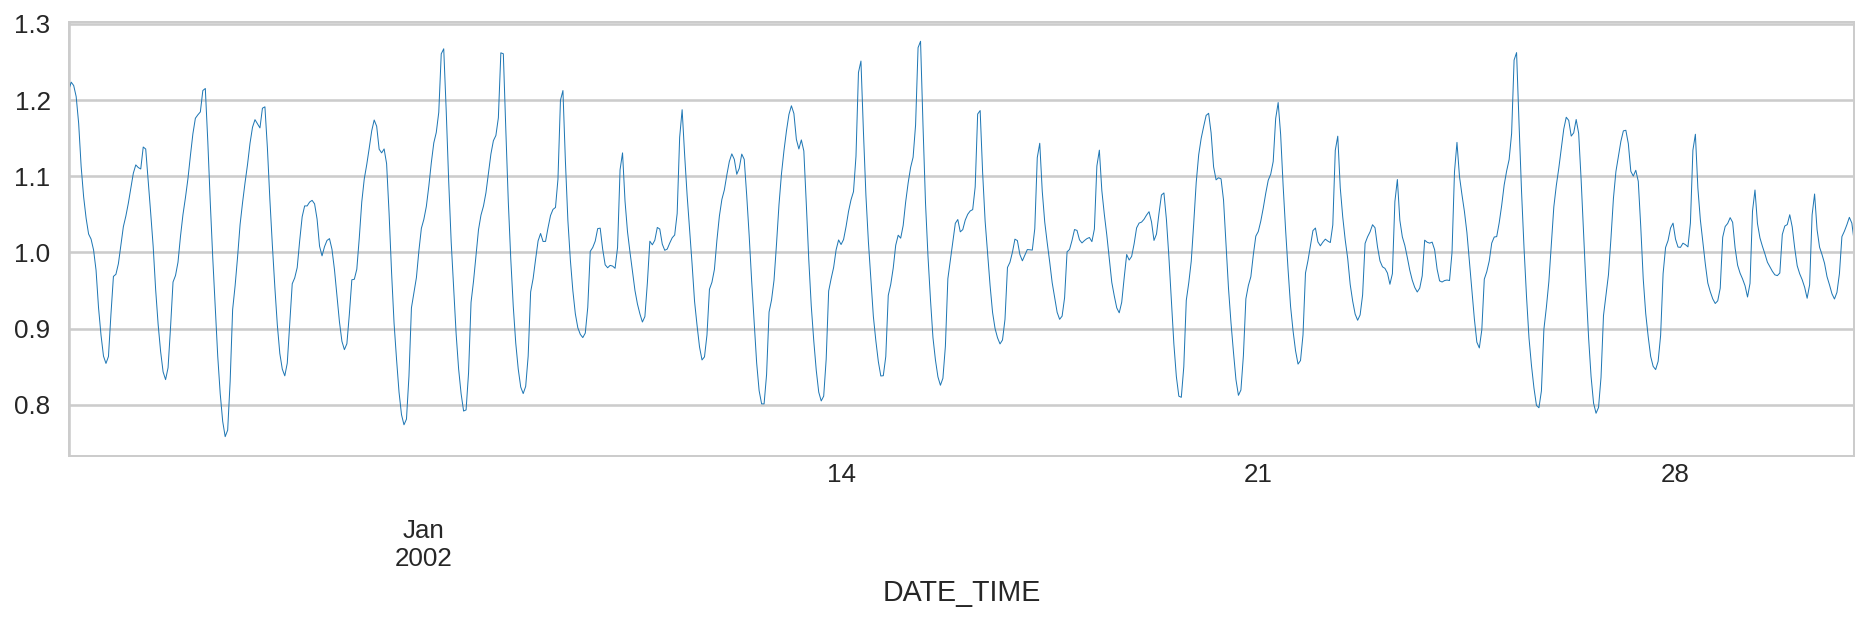

In [12]:
R_d[:24 * 30].plot(figsize=(16,4), linewidth=0.5)

### Analyzing further the $T_d$ Component: Identifying Weekly Patterns

We have extracted three time series (trend, seasonal, residual) from the main time series, after extracting the daily component. 

In [13]:
decompose = seasonal_decompose(T_d, 
                                model='multiplicative', 
                                period=24 * 7, 
                                extrapolate_trend='freq')

T_w, S_w, R_w = decompose.trend, decompose.seasonal, decompose.resid

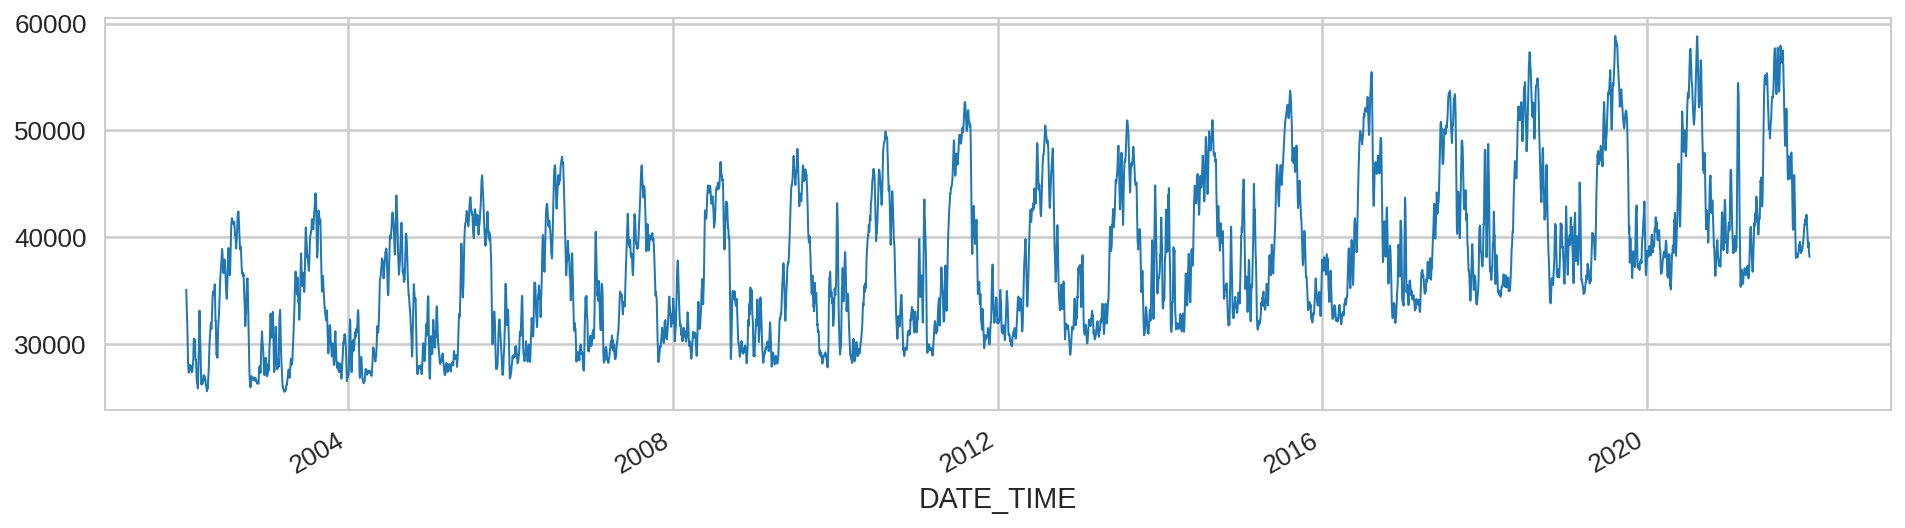

In [14]:
# This is the remaining trend component after removing daily and weekly fluctuations
T_w.plot(figsize=(16,4), linewidth=1)

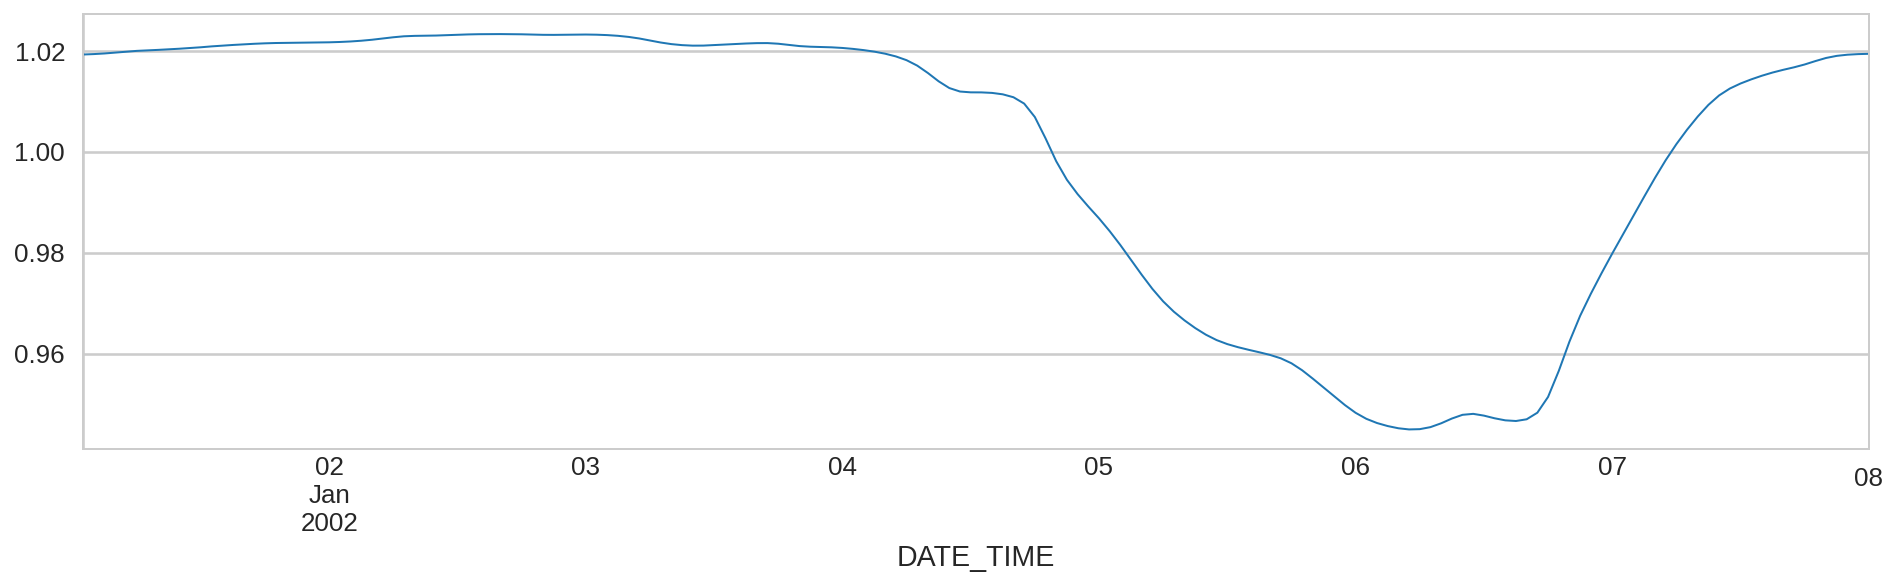

In [15]:
# This shows the weekly seasonality
S_w[0:24*7].plot(figsize=(16,4), linewidth=1)

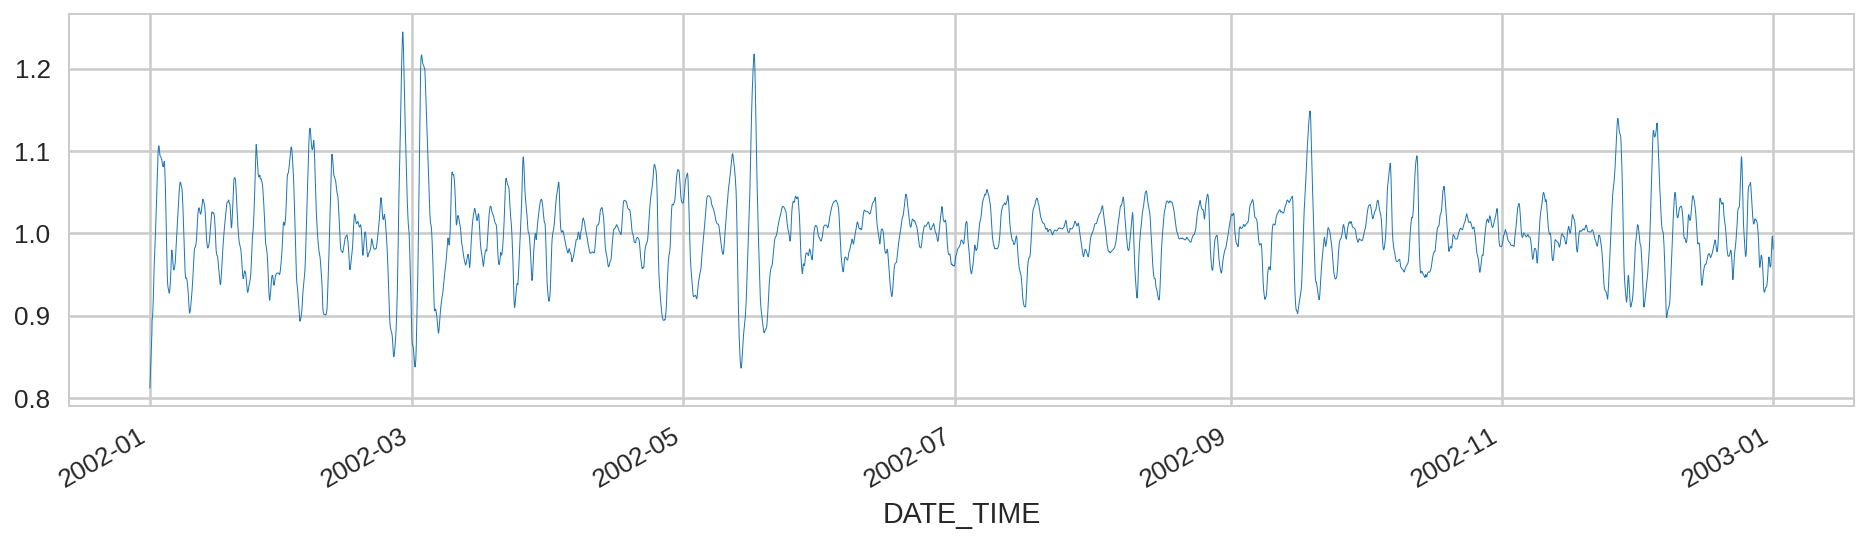

In [16]:
# This shows the residual, after removing the daily and weekly
R_w[:24*365].plot(figsize=(16,4), linewidth=0.5)

### Analyzing further the $T_w$ Component: Identifying yearly Patterns

In [17]:
decompose = seasonal_decompose(T_w, 
                                model='multiplicative', 
                                period=24 * 365, 
                                extrapolate_trend='freq')

T_y, S_y, R_y = decompose.trend, decompose.seasonal, decompose.resid

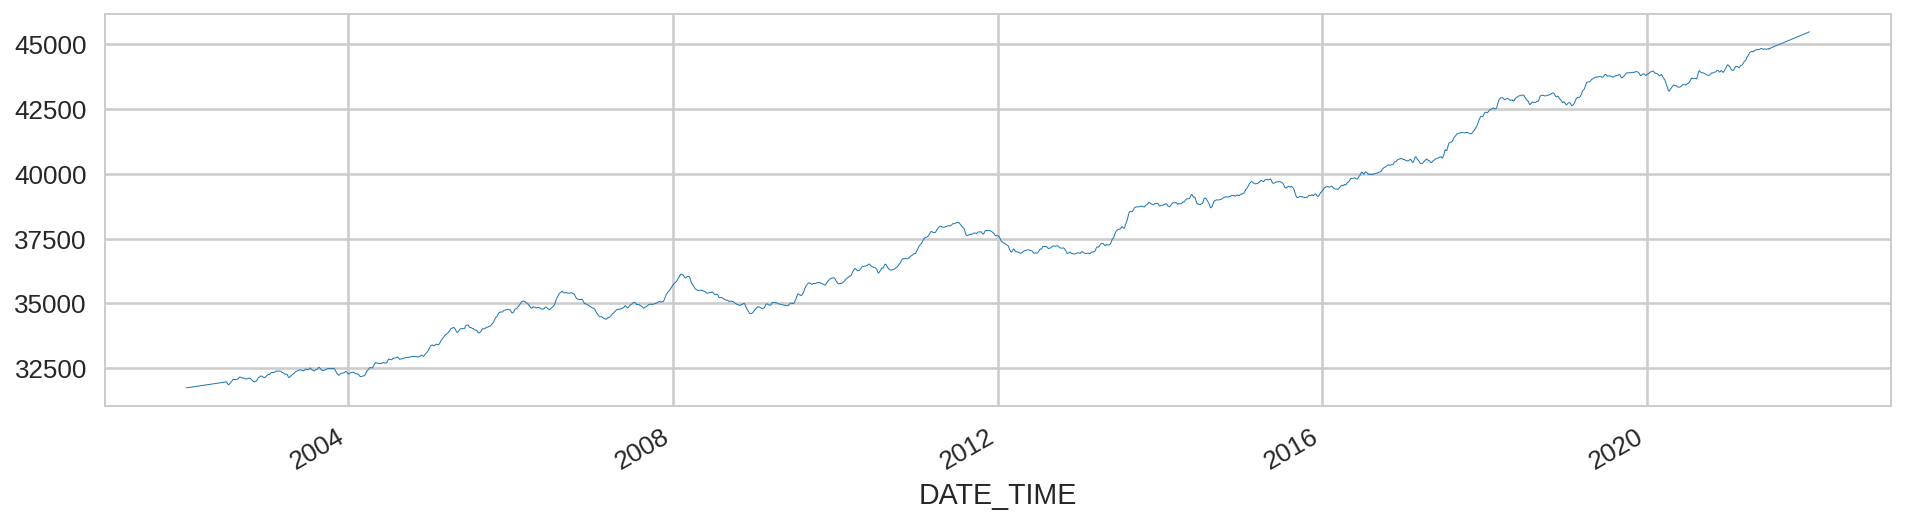

In [18]:
# This shows the overall trend, after removing daily, weekly, and yearly seasonality
T_y.plot(figsize=(16,4), linewidth=0.5)

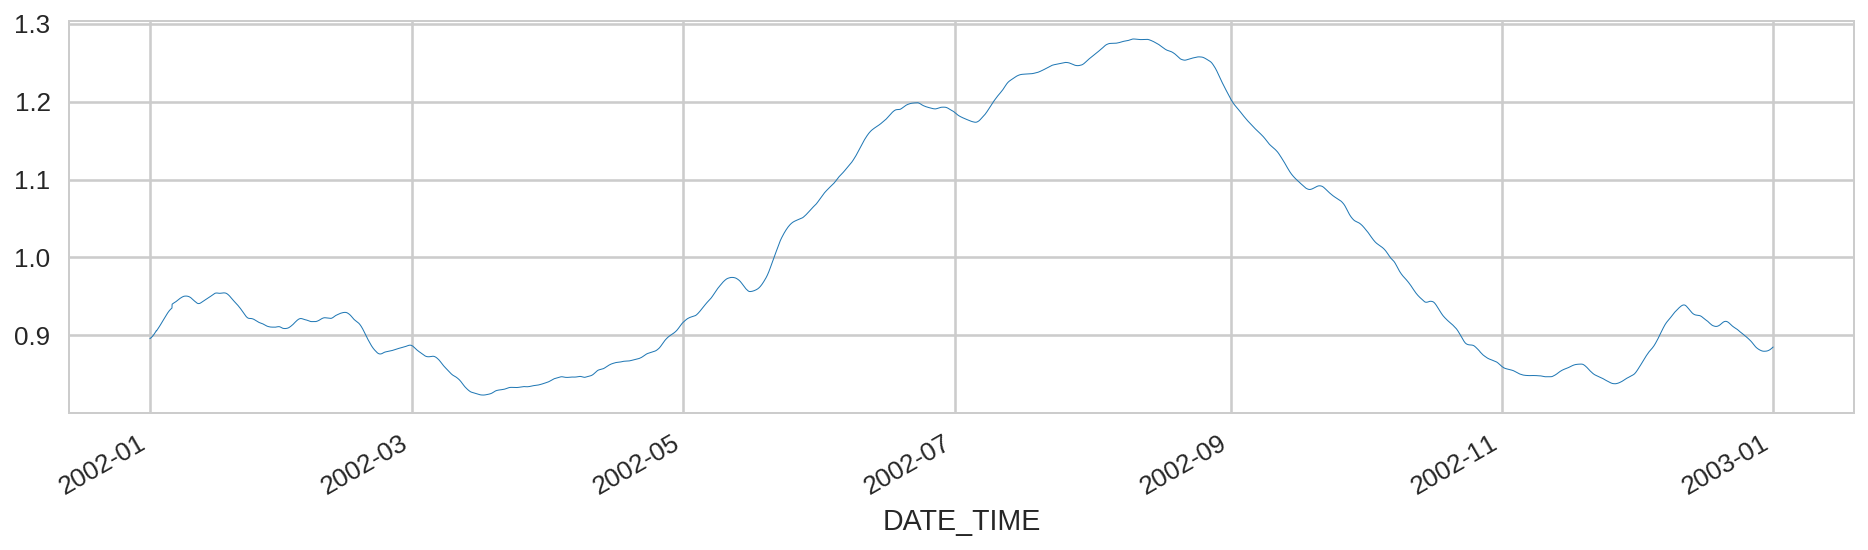

In [19]:
# This shows the yearly seasonality
S_y[:24*365].plot(figsize=(16,4), linewidth=0.5)

## Summary

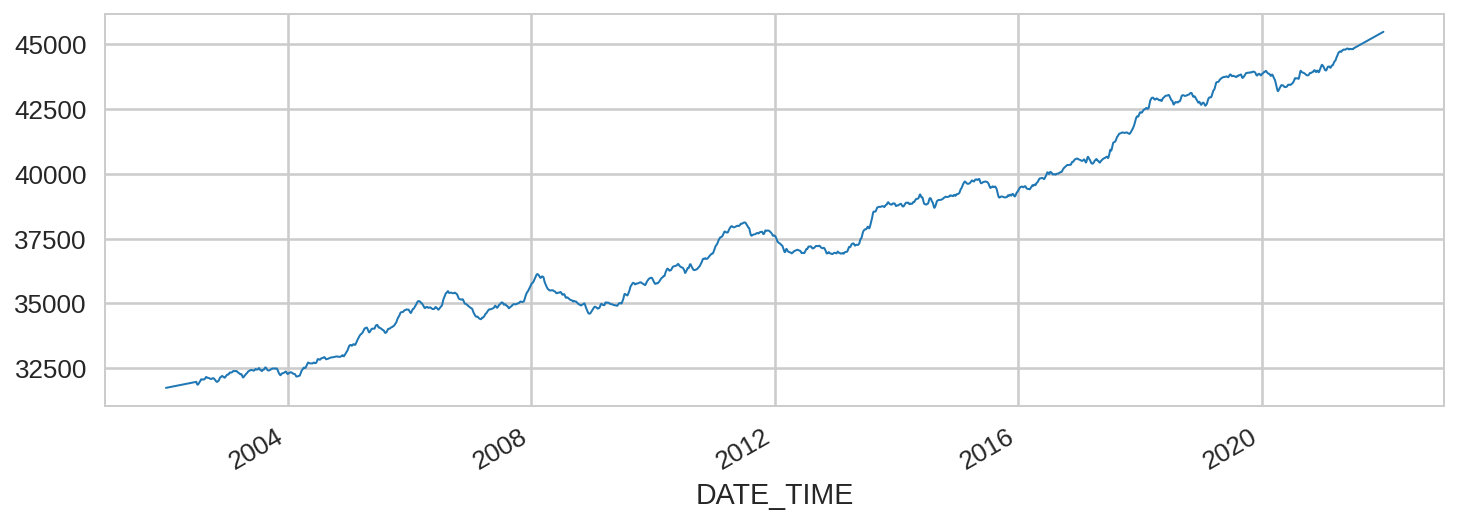

In [33]:
# This shows the overall trend, after removing daily, weekly, and yearly seasonality
T_y.plot(figsize=(12,4), linewidth=1)

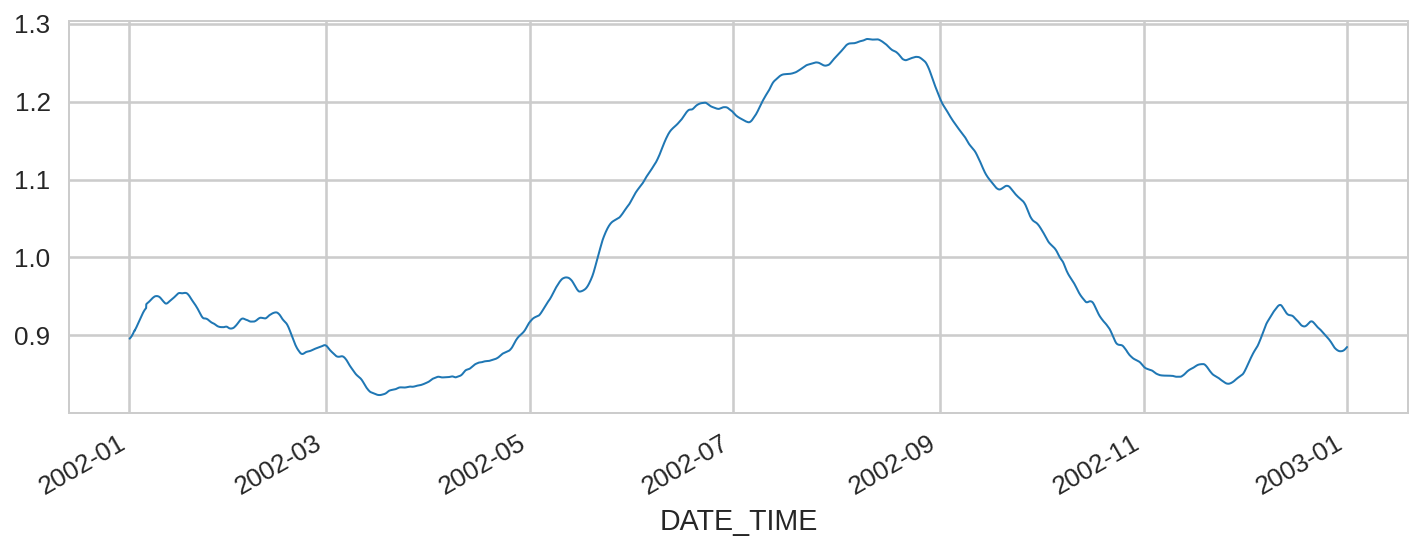

In [34]:
# This shows the yearly seasonality. We show the 
# first 365 days * 24 hours as the pattern repeats in subsequent periods
S_y[0:24*365].plot(figsize=(12,4), linewidth=1)

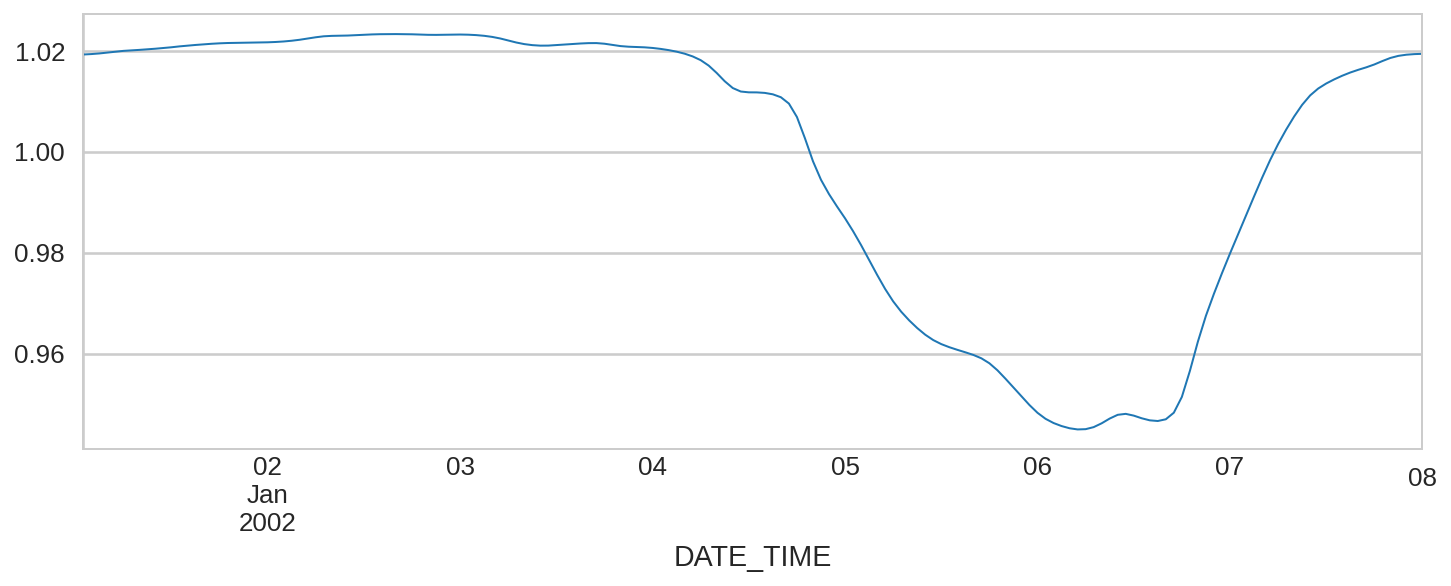

In [35]:
# This shows the weekly seasonality. We show the first
# 7 days multiplied with 24 hours as the pattern repeats in subsequent periods
S_w[0:24*7].plot(figsize=(12,4), linewidth=1)

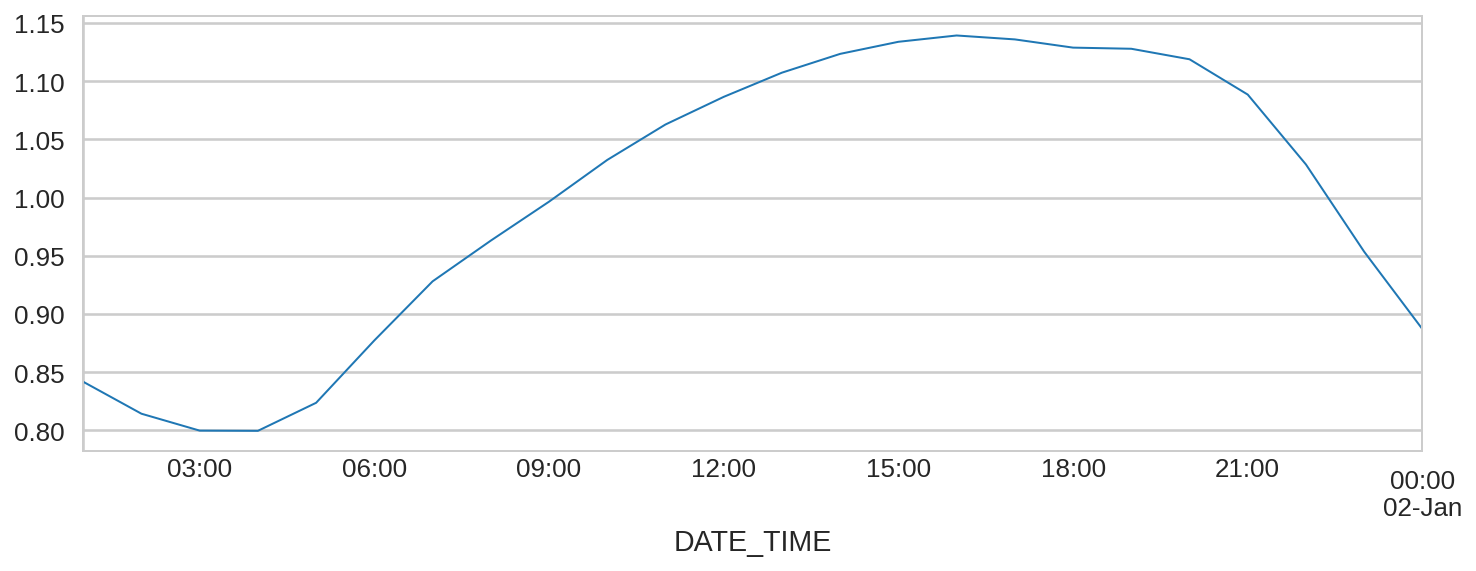

In [36]:
# This shows the daily seasonality. We show the first
# 24 hours, as the pattern repeats in subsequent periods
S_d[:24].plot(figsize=(12,4), linewidth=1)

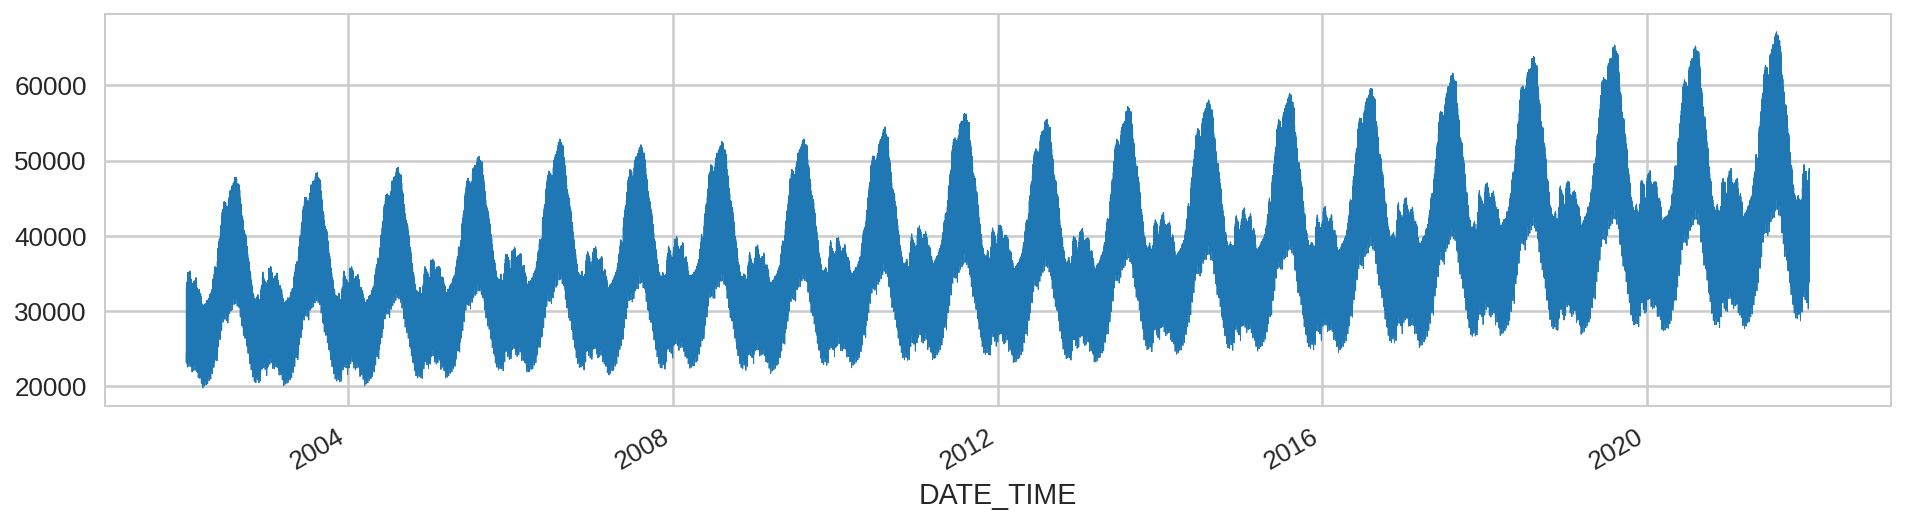

In [39]:
# This is the time series with the overall trend, plus seasonality 
(T_y * S_y * S_w * S_d).plot(figsize=(16,4), linewidth=0.5)

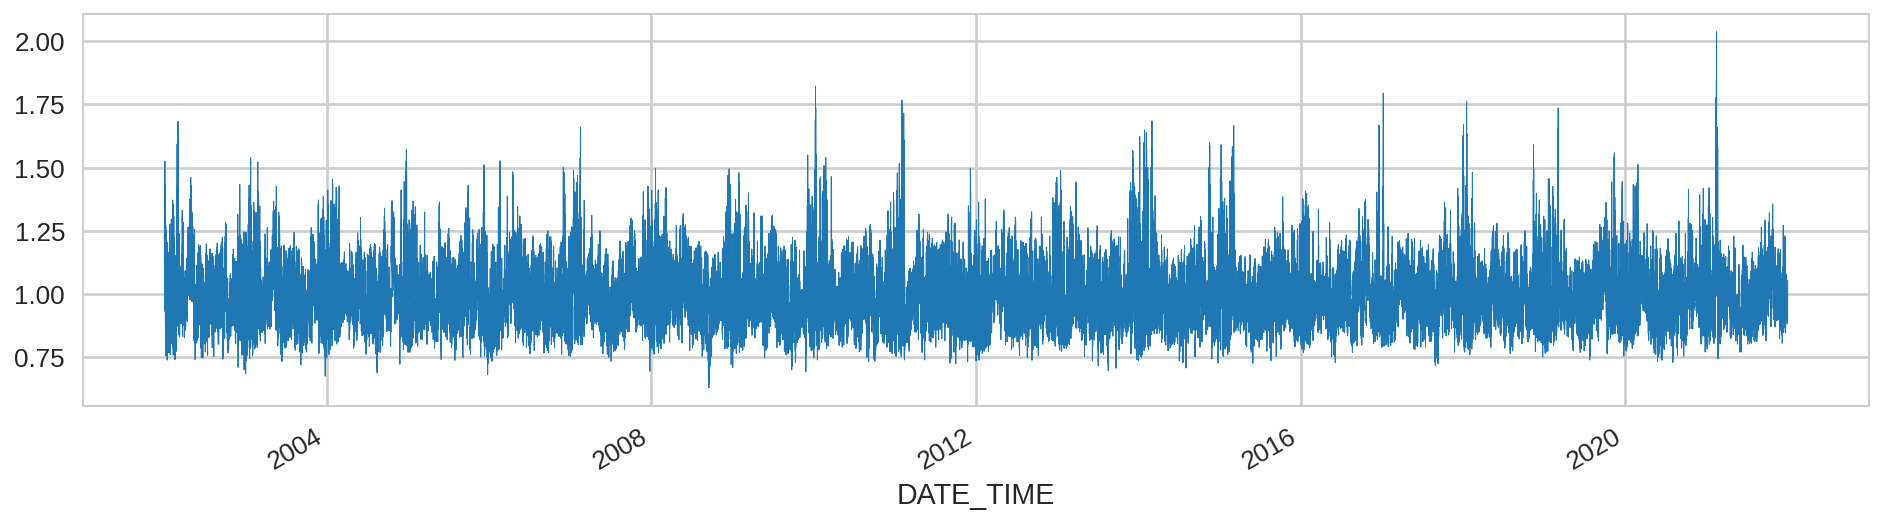

In [25]:
# This is the residual, that is not captured by the trend or seasonality
# When we are modeling, we really talk about forecasting the trend and 
# potentially modeling this time series, which has been de-trended 
# and de-seasonalized.
( R_y * R_w * R_d ).plot(figsize=(16,4), linewidth=0.5)

In [51]:
# A high autocorrelation means that consumption is 
# still clustered in time periods.
(R_y * R_w * R_d).autocorr()

0.973156306152304

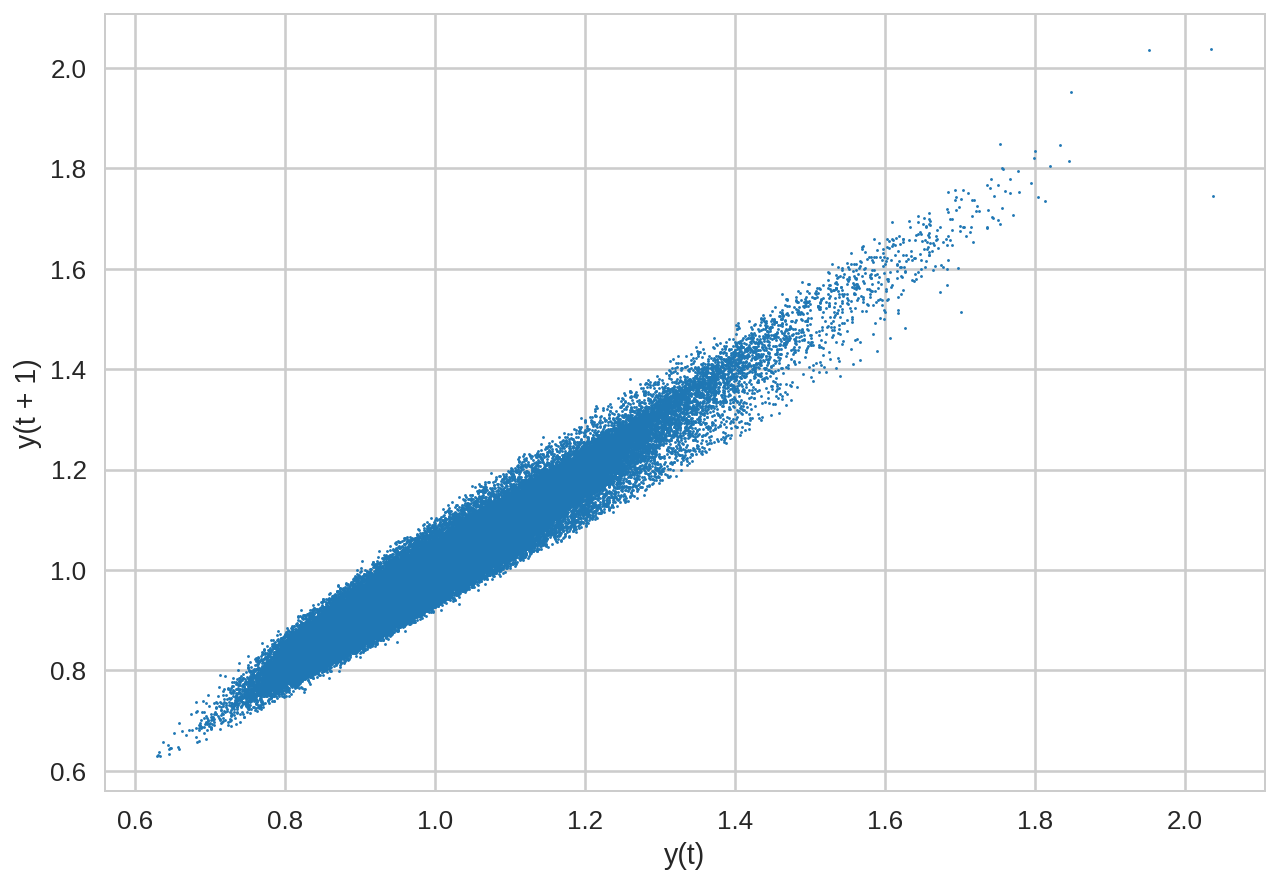

In [49]:
ax = pd.plotting.lag_plot((R_y * R_w * R_d), lag=1, s=1)

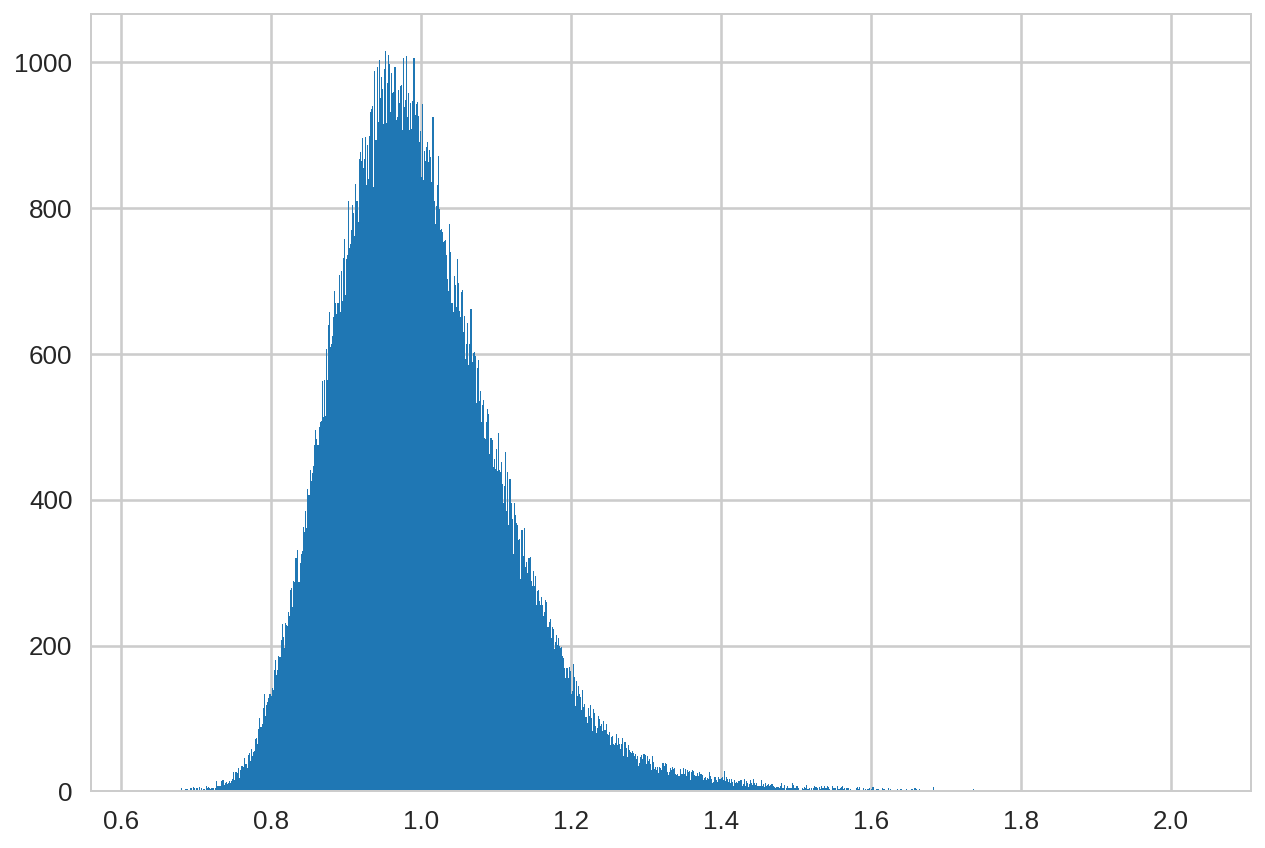

In [26]:
( R_y * R_w * R_d ).hist(bins=1000)

In [32]:
# Examine the quantiles of the residual distribution
# These are the values with which we need to multiply our 
# trend and seasonality projections to estimate maximum capacity
# 
# 99% = For 87.6 hours in a year, consumption is above this level
# 99.9% = For 8.76 hours in a year, consumption is above this level
# 99.99% = For 52 mins in a year, consumption is above this level
# 99.999% = For 5.2 mins in a year, consumption is above this level

q=[0.5,0.75,0.9,0.99,0.999,0.9999,0.99999]
(R_y * R_w * R_d).quantile(q)

0.50000    0.985870
0.75000    1.064033
0.90000    1.147113
0.99000    1.360772
0.99900    1.605893
0.99990    1.758728
0.99999    1.972906
Name: resid, dtype: float64

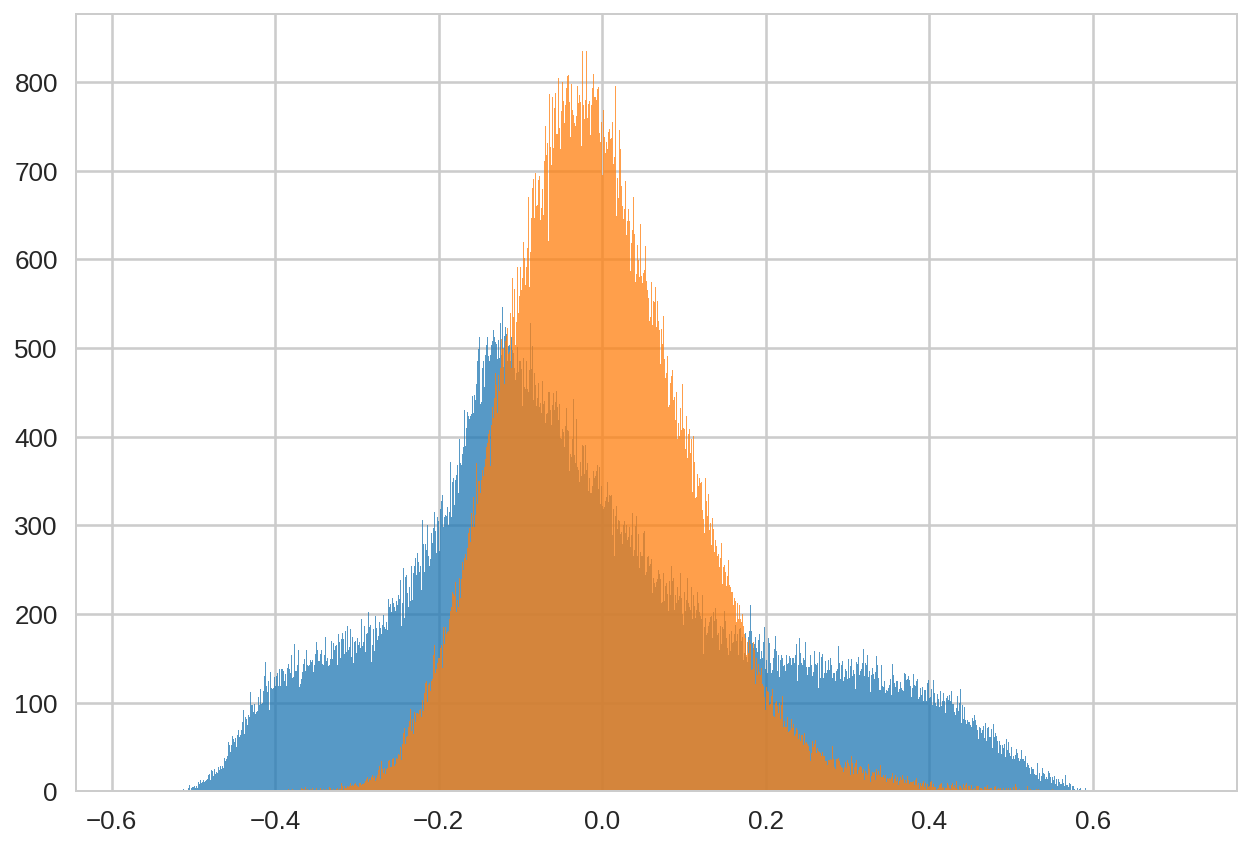

In [27]:
# Plots the histogram of the log of the residuals after removing the trend
np.log(Y / T_y).hist(bins=1000, alpha=0.75)

# Plots the histogram of the log of the residuals after removing trend and seasonality
np.log(Y / (T_y * S_y * S_w * S_d)).hist(bins=1000, alpha=0.75)